In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test['Loan_Status'] = np.nan
df_train['Source'] = "Train"
df_test['Source'] = "Test"
df=pd.concat((df_train,df_test),axis=0)

In [3]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])
df.Married=df.Married.fillna(df.Married.mode()[0])

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Train


In [5]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])
df.Married=df.Married.fillna(df.Married.mode()[0])
df.Dependents=df.Dependents.fillna(df.Dependents.mode()[0])
df.Dependents.replace({"3+":3},inplace=True)
df.Self_Employed=df.Self_Employed.fillna(df.Self_Employed.mode()[0])
df["Total_Income"] = df.ApplicantIncome + df.CoapplicantIncome
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Status=df.Loan_Status.replace({"Y":1,"N":0})
df.Credit_History=df.Credit_History.fillna(df.Loan_Status)
df.Dependents=df.Dependents.astype(int)
df.Credit_History=df.Credit_History.fillna(df.Credit_History.mode()[0])
df_preprocessed = pd.concat(((df.select_dtypes(exclude="object")),(pd.get_dummies(Categorical)),(df[['Loan_ID','Source']])),axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 15 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null int32
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null float64
Source               981 non-null object
Total_Income         981 non-null float64
dtypes: float64(6), int32(1), int64(1), object(7)
memory usage: 138.8+ KB


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,1.0,Train,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,0.0,Train,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,1.0,Train,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,1.0,Train,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,1.0,Train,6000.0


In [106]:
df[df.LoanAmount.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income


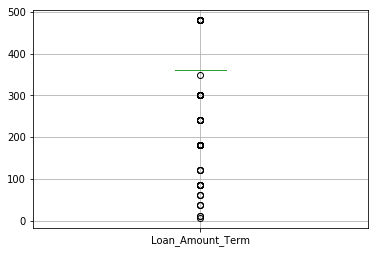

In [68]:
df.boxplot(column=['LoanAmount'])#,'Total_Income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148A9DBC160>]],
      dtype=object)

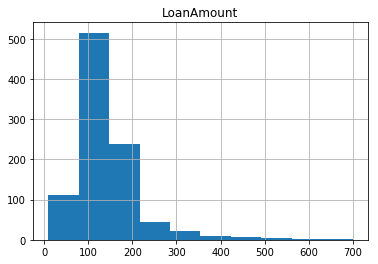

In [77]:
df.hist(column=['LoanAmount'])#,'Total_Income'])

In [17]:
Categorical = df.select_dtypes(include="object").drop(columns={'Loan_ID','Source'})

In [48]:
df_preprocessed = pd.concat(((df.select_dtypes(exclude="object")),(pd.get_dummies(Categorical)),(df[['Loan_ID','Source']])),axis=1)

In [52]:
df_trained = df_preprocessed[df_preprocessed.Source =='Train'].drop(columns={"Source"})
df_tested = df_preprocessed[df_preprocessed.Source =='Test'].drop(columns={"Source","Loan_Status"})

# Feature Selection 

In [56]:
from sklearn import datasets
from sklearn.feature_selection import rfe

In [57]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [62]:
X=df_trained.drop(columns={'Loan_ID','Loan_Status'})
y=df_trained['Loan_Status']

In [63]:
X_train , x_test , y_train, y_test = train_test_split(X,y,test_size=.25,random_state=12)
algDT = DecisionTreeClassifier()
algDT.fit(X_train,y_train)
y_predict_train = algDT.predict(X_train)

In [69]:
print(metrics.confusion_matrix(y_train,y_predict_train))
print(metrics.accuracy_score(y_train,y_predict_train))
print(metrics.classification_report(y_train,y_predict_train))

[[144   0]
 [  0 316]]
1.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       144
        1.0       1.00      1.00      1.00       316

avg / total       1.00      1.00      1.00       460



In [66]:
y_predict_test = algDT.predict(x_test)

In [68]:
print(metrics.confusion_matrix(y_test,y_predict_test))
print(metrics.accuracy_score(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test))

[[33 15]
 [26 80]]
0.7337662337662337
             precision    recall  f1-score   support

        0.0       0.56      0.69      0.62        48
        1.0       0.84      0.75      0.80       106

avg / total       0.75      0.73      0.74       154

